# Distâncias e matrizes

A matriz de distância é feita através da utilização da função `pdist`; como já mencionado a distância euclidiana entre dois pontos $p$ e $q$ é $ d\left( p,q\right) = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 }$, para $n$ dimensões. De forma a facilitar a intuição de como esta distância é aplicada ao registo de votações vamos, passo a passo, analisar um caso simplificado (o que nos serve também de forma de validação indirecta do processo).

Vamos criar um cenário com três partidos, com nomes que reflectem o seu perfil de votação:

* O Partido Favorável vota a favor.
* O Partido Abstencionista abstem-se (pelo menos até certo ponto).
* O Partido do Contra vota contra.

## Uma votação, $ n = 1 $

Começemos por uma única votação, onde cada um dos partidos segue a sua linha programática:

In [1]:
import pandas as pd
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
%matplotlib inline

In [2]:

v1=[[1],[0],[-1]]
v1_df = pd.DataFrame(v1, columns=["v1"], index=["F","A", "C"])
v1_df

,v1
F,1
A,0
C,-1


Com uma única votação o número de dimensões é de $n = 1$ e é bastante intuitivo que a distância entre eles é a  _norma_:$ d\left( x,y\right)   = | x - y |$; entre 1 e 0 a distância é 1, entre 1 e -1 a distância é 2, etc. Para $ n = 1 $ a distância euclidiana é equivalente à norma, pois $ \sqrt{\left( q - p\right)^2} = | q - p | $, como pode ser observado quando medidas a distância entre eles:

In [3]:
import math
## We could also sue the array directly, e.g.
## print("Distance from" , a[0][0] , "and" , a[1][0],"=",math.sqrt((a[0][0]-a[1][0]) ** 2))

print("Distance from", v1_df.loc["F"].name, "and", v1_df.loc["A"].name, "=", 
      math.sqrt((v1_df.loc["F"]["v1"]-v1_df.loc["A"]["v1"]) ** 2))
print("Distance from", v1_df.loc["F"].name, "and", v1_df.loc["C"].name, "=", 
      math.sqrt((v1_df.loc["F"]["v1"]-v1_df.loc["C"]["v1"]) ** 2))
print("Distance from", v1_df.loc["A"].name, "and", v1_df.loc["C"].name, "=", 
      math.sqrt((v1_df.loc["A"]["v1"]-v1_df.loc["C"]["v1"]) ** 2))

Distance from F and A = 1.0
Distance from F and C = 2.0
Distance from A and C = 1.0


Temos a distância entre os três possíveis pares: a distância entre _F_ e _A_ é idêntica à distância entre _A_ e _F_. Isto é importante porque ajuda a explicar a diferença entre a forma "condensada" e forma "quadrada". A função `pdist` retorna a distância entre os vários pares na forma _condensada_:

In [4]:
pdist(v1_df)

array([1., 2., 1.])

Estes são os mesmos valores que obtivemos de forma manual, e é isso que a função faz: calcula uma determinada distância (euclidiana, neste caso e por omissão) entre todos os pares possíveis, sem que seja necessário especificarmos todas as combinações possíveis.

Este formato condensado não é o que permite uma leitura mais imediata, e para tal existe a função `squareform` que apresenta os mesmos resultados mas numa matriz simétrica:

In [5]:
squareform(pdist(v1_df))

array([[0., 1., 2.],
       [1., 0., 1.],
       [2., 1., 0.]])

Em formato tabular torna-se ainda mais claro... e isto é exactmante a matriz de distância usada para o mapa térmico

In [6]:
v1_distmat=pd.DataFrame(squareform(pdist(v1)), columns=v1_df.index, index=v1_df.index)
v1_distmat

,F,A,C
F,0.0,1.0,2.0
A,1.0,0.0,1.0
C,2.0,1.0,0.0


Geometricamente temos pontos numa recta: uma análise das distâncias entre os três partidos com base no histórico de votação seria simples de visualizar com base na posição desses pontos:

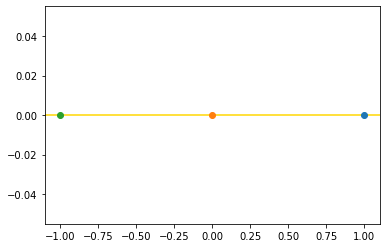

In [7]:
fig, ax = plt.subplots()
ax.axhline(y=0,c="gold",zorder=-1)

for x in v1_df["v1"]:
    ax.scatter(x,y=0,)
plt.show()

Com base na matriz de distância contruimos o mapa térmico de forma muito simples:

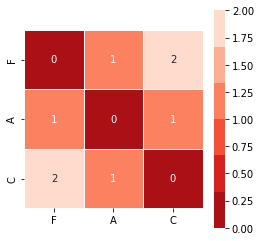

In [8]:
plt.figure(figsize=(4,4))
sns.heatmap(
    v1_distmat,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    annot = True,
    square =True,
)
plt.show()

...e o agrupamento com base nessa matriz:

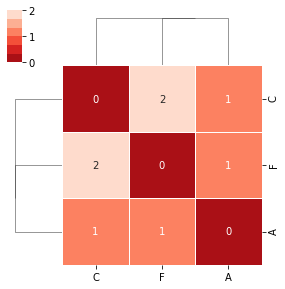

In [9]:
v1_distmat_link = hc.linkage(pdist(v1_df))

sns.clustermap(
    v1_distmat,
    annot = True,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    row_linkage=v1_distmat_link,
    col_linkage=v1_distmat_link,
    figsize=(4,4)
)
plt.show()

## Duas votações, $ n = 2 $

Usando a mesma abordagem (agora sem necessidade de explicações adicionais) adicionamos mais uma votação, sempre em linha com o perfil fixo de votos de cada um: cada partido passa a ter dois votos, logo temos duas dimensões:

In [10]:
v2=[[1,1],[0,0],[-1,-1]]
v2_df = pd.DataFrame(v2, columns=["v1","v2"], index=["F","A", "C"])
v2_df

,v1,v2
F,1,1
A,0,0
C,-1,-1


A distância euclidiana é agora feita de forma mais genérica: a raíz quadrada da soma do quadrado das diferenças: para a primeira diferença isto significa, passo a passo e para $q=F$ e $p=A$:

$ d\left(q,p\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } = \sqrt{\left( q_{1}-p_{1}\right)^2  + \left( q_{2}-p_{2}\right)^2 } = \sqrt{\left( 1 - 0\right)^2 + \left( 1 - 0\right)^2} = \sqrt{ 1^2  + 1^2 } = \sqrt{1+1} = \sqrt{2} \approx  1.4142135623730951 $

E de facto:

In [11]:
print(math.sqrt(sum((px - qx) ** 2.0 for px, qx in zip(v2_df.loc["F"],v2_df.loc["A"]))))
print(math.sqrt(sum((px - qx) ** 2.0 for px, qx in zip(v2_df.loc["F"],v2_df.loc["C"]))))
print(math.sqrt(sum((px - qx) ** 2.0 for px, qx in zip(v2_df.loc["A"],v2_df.loc["C"]))))

1.4142135623730951
2.8284271247461903
1.4142135623730951


Tal como antes é idêntico ao resultado de `pdist`, tanto na sua forma condensada como quadrada:

In [12]:
print("pdist:\n", pdist(v2),"\n")
print("squareform:\n",squareform(pdist(v2)))
v2_distmat=pd.DataFrame(squareform(pdist(v2)), columns=v2_df.index, index=v2_df.index)
v2_distmat

pdist:
 [1.41421356 2.82842712 1.41421356] 

squareform:
 [[0.         1.41421356 2.82842712]
 [1.41421356 0.         1.41421356]
 [2.82842712 1.41421356 0.        ]]


,F,A,C
F,0.000000,1.414214,2.828427
A,1.414214,0.000000,1.414214
C,2.828427,1.414214,0.000000


Com duas votações temos $ n = 2 $ e conseguimos ver os pontos num espaço cartesiano em $ \mathbb{R}^2 $ (um plano).

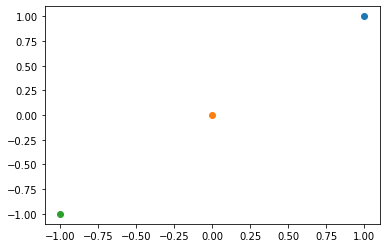

In [13]:
fig, ax = plt.subplots()
for x,y in zip(v2_df["v1"], v2_df["v2"]):
    ax.scatter(x,y)

A matriz de distância seria neste caso, como no anterior, desnecessária (em $ \mathbb{R}^2 $ as distâncias entre os partidos são óbvias por facilmente visualizáveis); a forma de a construir é idêntica:

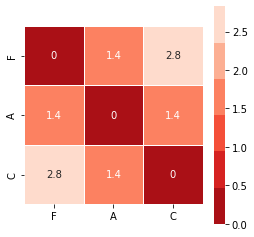

In [14]:
plt.figure(figsize=(4,4))

sns.heatmap(
    v2_distmat,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    annot = True,
    square =True,
)
plt.show()


... e o _clustermap_ que agrega distâncias e agrupamento num único gráfico:

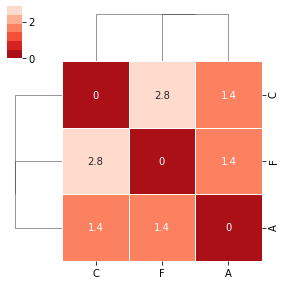

In [15]:
v2_distmat_link = hc.linkage(pdist(v2_df))

sns.clustermap(
    v2_distmat,
    annot = True,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    row_linkage=v2_distmat_link,
    col_linkage=v2_distmat_link,
    figsize=(4,4)
)
plt.show()

## Três votações, $ n = 3 $

Este é o último caso onde a visualização pode ser feita de forma directa. Consideremos:

In [16]:
v3=[[1,1,1],[0,0,0],[-1,-1,-1]]
v3_df = pd.DataFrame(v3, columns=["v1","v2", "v3"], index=["F","A", "C"])
v3_df

,v1,v2,v3
F,1,1,1
A,0,0,0
C,-1,-1,-1


A distância é calculada da mesma forma:

In [17]:
print(math.sqrt(sum((px - qx) ** 2.0 for px, qx in zip(v3_df.loc["F"],v3_df.loc["A"]))))
print(math.sqrt(sum((px - qx) ** 2.0 for px, qx in zip(v3_df.loc["F"],v3_df.loc["C"]))))
print(math.sqrt(sum((px - qx) ** 2.0 for px, qx in zip(v3_df.loc["A"],v3_df.loc["C"]))))

1.7320508075688772
3.4641016151377544
1.7320508075688772


... bem como a matriz de distância:

In [18]:
print("pdist:\n", pdist(v3),"\n")
print("squareform:\n",squareform(pdist(v3)))
v3_distmat=pd.DataFrame(squareform(pdist(v3)), columns=v3_df.index, index=v3_df.index)
v3_distmat

pdist:
 [1.73205081 3.46410162 1.73205081] 

squareform:
 [[0.         1.73205081 3.46410162]
 [1.73205081 0.         1.73205081]
 [3.46410162 1.73205081 0.        ]]


,F,A,C
F,0.000000,1.732051,3.464102
A,1.732051,0.000000,1.732051
C,3.464102,1.732051,0.000000


e o correspondente mapa térmico:

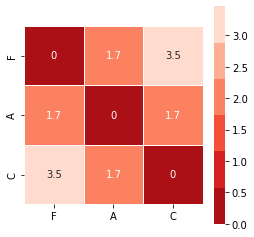

In [19]:
plt.figure(figsize=(4,4))

sns.heatmap(
    v3_distmat,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    annot = True,
    square =True,
)
plt.show()


O _clustermap_ apresenta os mesmos valores, mas reordenando colunas e linhas de forma a apresentar o resultado do agrupamento; note-se que, neste caso, não é apresentado nenhum agrupamento entre 2 dos partidos pois todos divergem de forma equidistante, constituindo três grupos separados:

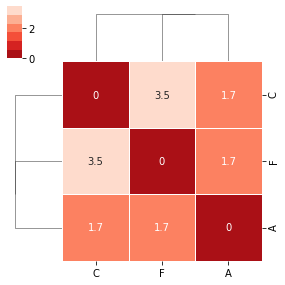

In [20]:
v3_distmat_link = hc.linkage(pdist(v3_df))

sns.clustermap(
    v3_distmat,
    annot = True,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    row_linkage=v3_distmat_link,
    col_linkage=v3_distmat_link,
    figsize=(4,4)
)
plt.show()

Estamos agora em $ \mathbb{R}^3 $, e para visualizar podemos usar uma projecção tridimensional:

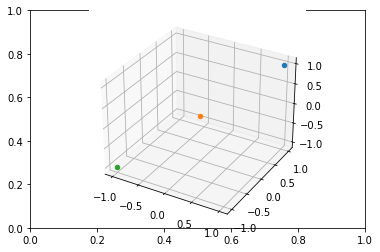

In [21]:
fig, ax = plt.subplots()
ax = fig.add_subplot(111,projection='3d')

for x,y,z in zip(v3_df["v1"], v3_df["v2"], v3_df["v3"]):
    ax.scatter(x,y,z)


## Mais de três votações, $ n > 3 $

A partir daqui coloca-se a questão fundamental: a impossibilidade de visualizar de forma directa a distância para além das três dimensões. A distância existe e segue exactamente os mesmo passos, simplesmente não é passível de visualização, razão pela qual é necessário (agora sim) depender de formas que "reduzam" as dimensões e as tornem visualizáveis.

Até agora os agrupamentos têm sido sempre iguais pois a distância é sempre linear; vamos neste último caso assumir que o Partido Abstencionista teve uma mudança de posição e passou a votar por vezes a favor e contra, embora mais contra que a favor:

In [22]:
v4=[[1,1,1,1,1,1,1,1,1,1],[0,0,0,1,0,-1,0,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]
v4_df = pd.DataFrame(v4, columns=["v1","v2", "v3","v4","v5","v6","v7","v8","v9","v10"], index=["F","A", "C"])
v4_df

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
F,1,1,1,1,1,1,1,1,1,1
A,0,0,0,1,0,-1,0,-1,-1,-1
C,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


A distância calculdada "manualmente":

In [23]:
print(math.sqrt(sum((px - qx) ** 2.0 for px, qx in zip(v4_df.loc["F"],v4_df.loc["A"]))))
print(math.sqrt(sum((px - qx) ** 2.0 for px, qx in zip(v4_df.loc["F"],v4_df.loc["C"]))))
print(math.sqrt(sum((px - qx) ** 2.0 for px, qx in zip(v4_df.loc["A"],v4_df.loc["C"]))))

4.58257569495584
6.324555320336759
3.0


... e o cálculo via `pdist` e a  matriz de distância:

In [24]:
print("pdist:\n", pdist(v4),"\n")
print("squareform:\n",squareform(pdist(v4)))
v4_distmat=pd.DataFrame(squareform(pdist(v4)), columns=v4_df.index, index=v4_df.index)
v4_distmat

pdist:
 [4.58257569 6.32455532 3.        ] 

squareform:
 [[0.         4.58257569 6.32455532]
 [4.58257569 0.         3.        ]
 [6.32455532 3.         0.        ]]


,F,A,C
F,0.000000,4.582576,6.324555
A,4.582576,0.000000,3.000000
C,6.324555,3.000000,0.000000


O mapa térmico:

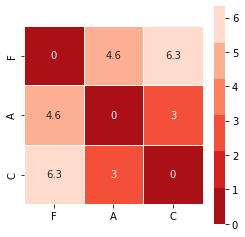

In [25]:
plt.figure(figsize=(4,4))

sns.heatmap(
    v4_distmat,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    annot = True,
    square =True,
)
plt.show()


... e o dendograma, já apresentando um agrupamento com base na maior aproximação com base no registo de votação:

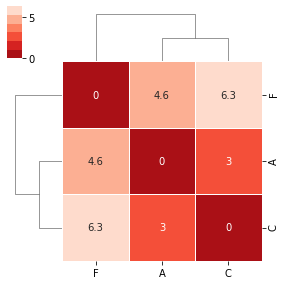

In [26]:
v4_distmat_link = hc.linkage(pdist(v4_df), method="ward")

sns.clustermap(
    v4_distmat,
    annot = True,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    row_linkage=v4_distmat_link,
    col_linkage=v4_distmat_link,
    figsize=(4,4)
)
plt.show()

E aqui pode ser observado o resultado (e a utilidade) do cálculo das distâncias e da utilização de _clustering_: ao observarmos os votos acima conseguimos, intuitivamente, determinar que o partido do _A_ está mais próximo do _C_, mas fazer o mesmo para 100, 1000 ou 10000 votações seria manifestamente mais difícil.